In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

## Styrofoam Data

In [2]:
file = open('Lab6StyrofoamCup1.csv', 'r')
time_total, temperature_total  = np.loadtxt("Lab6StyrofoamCup1.csv", delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

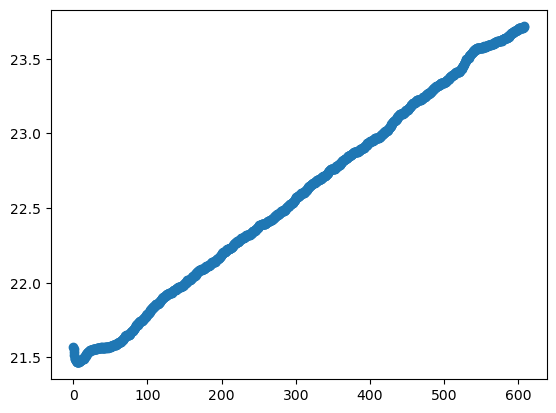

In [3]:
plt.scatter(time_total, temperature_total)

In [4]:
start_time = 100
stop_time = 500
in_range = (time_total >= start_time) & (time_total <= stop_time)
time, temperature = time_total[in_range], temperature_total[in_range]

Text(0, 0.5, 'Temperature (°C)')

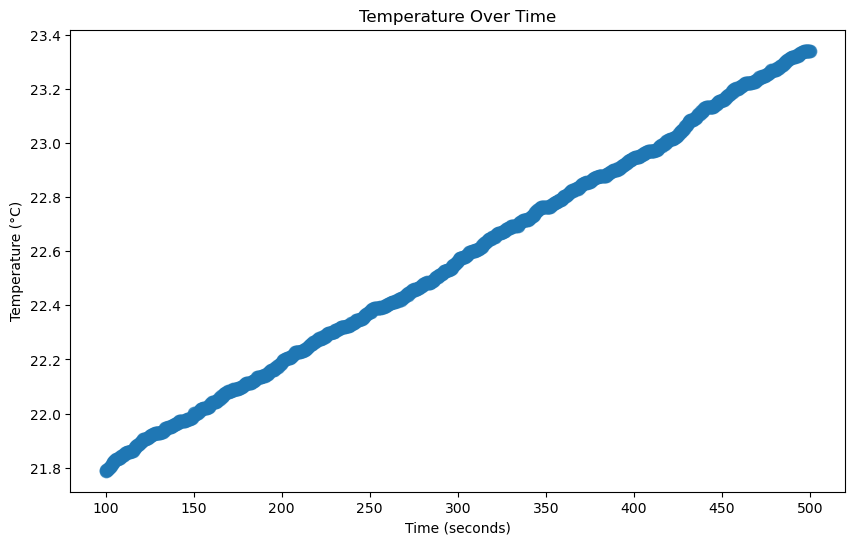

In [5]:
plt.figure(figsize=(10, 6))  
plt.scatter(time, temperature, s=80, alpha=0.7)
plt.title("Temperature Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (°C)")

Fitted ΔT₀: 21.442281376005422 ± 2.894693473136558e-06
Fitted β: -5876.33543162963 ± 4.661704572596275


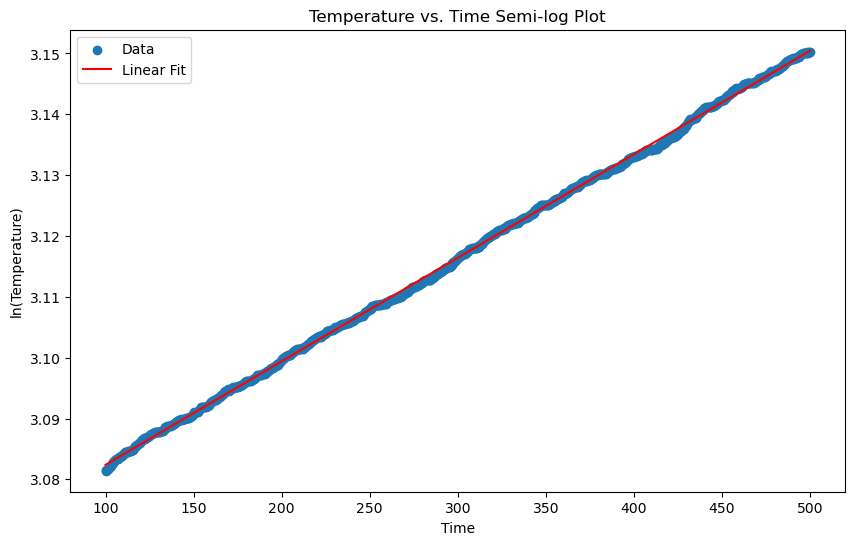

In [6]:
ln_temperature = np.log(temperature)

slope, intercept, r_value, p_value, std_err = linregress(time, ln_temperature)

T0_fit = np.exp(intercept)
beta_fit = -1 / slope

# Calculate errors
# Error in intercept (std error of intercept from linregress)
intercept_stderr = std_err  # linregress only provides the slope stderr, so use that
T0_error = T0_fit * intercept_stderr  # Propagate error for exp transformation

# Error in beta (using propagation for -1/slope)
beta_error = std_err / (slope ** 2)

# Print fitted parameters and their errors
print(f"Fitted ΔT₀: {T0_fit} ± {T0_error}")
print(f"Fitted β: {beta_fit} ± {beta_error}")

plt.figure(figsize=(10, 6))  
plt.scatter(time, ln_temperature, label='Data')
plt.plot(time, slope * time + intercept, label='Linear Fit', color='red')
plt.xlabel('Time')
plt.ylabel('ln(Temperature)')
plt.title("Temperature vs. Time Semi-log Plot")
plt.legend()
plt.show()

In [7]:
m = 0.114 # kg
c = 4184 # J/ kg C
l = 0.0028 # m
A = 2 * np.pi * 3.105 * 3.5 *10**-4 #m^2
beta = beta_fit 

k = (m * c * l) / (A * beta)
print(A)
print(f"Calculated k: {k}") # W/msC

0.006828251632577415
Calculated k: -0.03328422607544038


Fitted ΔT₀: 21.442076126666844 ± 0.01891864400691767
Fitted β: -5875.197461674259 ± 93.49676437923758


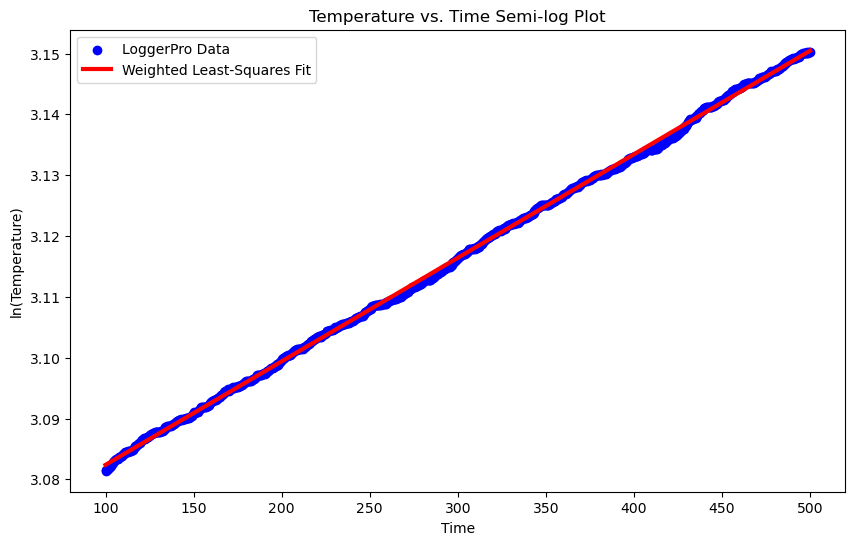

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sample data arrays (replace these with your actual data)
# time = np.array([...])
# temperature = np.array([...])

# Transform the temperature data by taking the natural log
ln_temperature = np.log(temperature)

# Define the uncertainties for ln(temperature)
sigma_T = 0.2  # Given uncertainty in temperature
sigma_ln_T = sigma_T / temperature  # Error propagation for ln(T)

# Define a linear model for fitting
def linear_model(t, intercept, slope):
    return intercept + slope * t

# Perform the weighted least squares fit using curve_fit
# Initial guesses for intercept and slope
initial_guess = [np.mean(ln_temperature), -1]

# Fit the data with weights (1 / sigma^2)
params, covariance = curve_fit(
    linear_model,
    time,
    ln_temperature,
    sigma=sigma_ln_T,
    p0=initial_guess,
    absolute_sigma=True  # Treats sigma as absolute errors
)

# Extract fitted parameters
intercept, slope = params
T0_fit = np.exp(intercept)  # Convert intercept to ΔT₀
beta_fit = -1 / slope  # Convert slope to β

# Calculate standard errors from the covariance matrix
intercept_error, slope_error = np.sqrt(np.diag(covariance))
T0_error = T0_fit * intercept_error  # Propagate error for exp(intercept)
beta_error = slope_error / (slope ** 2)  # Propagate error for -1/slope

# Print fitted parameters and their errors
print(f"Fitted ΔT₀: {T0_fit} ± {T0_error}")
print(f"Fitted β: {beta_fit} ± {beta_error}")

# Plotting the data and weighted linear fit
plt.figure(figsize=(10, 6))  
plt.scatter(time, ln_temperature, label='LoggerPro Data', color='blue')
plt.plot(time, linear_model(time, intercept, slope), label='Weighted Least-Squares Fit', color='red', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('ln(Temperature)')
plt.title("Temperature vs. Time Semi-log Plot")
plt.legend()
plt.show()


In [16]:
m = 0.114 # kg
alpha_m = .001
c = 4184 # J/ kg C
alpha_c = 41.84
l = 0.0028 # m
alpha_l = 0.0005
r = 3.105
alpha_r = 0.0005
h= 3.5
alpha_h = 0.0005
A = 2 * np.pi * r * h *10**-4 #m^2
alpha_A = 2 * np.pi * np.sqrt(r**2 * (4 * h**2 * alpha_r **2 + r ** 2 * alpha_h **2)) * 10**-4
beta = -beta_fit 
alpha_beta = -beta_error

k = (m * c * l) / (A * beta)


def calculate_alpha_k(A, B, c, l, m, alpha_m, alpha_l, alpha_c, alpha_B, alpha_A):
    term1 = (c**2 * l**2 * alpha_m**2 + c**2 * m**2 * alpha_l**2 + l**2 * m**2 * alpha_c**2) / (A**2 * B**2)
    term2 = (c**2 * l**2 * m**2 * alpha_B**2) / (A**3 * B**4)
    term3 = (B**2 * c**2 * l**2 * m**2 * alpha_A**2) / (A**4 * B**3)
    print(term1, term2, term3)
    alpha_k = np.sqrt(term1 + term2 + term3)
    return alpha_k

alpha_k = calculate_alpha_k(A, beta, c, l, m, alpha_m, alpha_l, alpha_c, alpha_beta, alpha_A)
print("Alpha_k:", alpha_k)

print(A)
print(alpha_A)
print(f"Calculated k: {k}") # W/msC

3.553631195178319e-05 4.110397837265796e-05 7.792433197761966e-06
Alpha_k: 0.009188728068791846
0.006828251632577415
7.4698564098799885e-06
Calculated k: 0.0332906729139524


In [17]:
# Calculate reduced chi-squared in its own cell
# Residuals calculation and reduced chi-squared
residuals = ln_temperature - linear_model(time, *params)
reduced_chi2 = np.sum((residuals / sigma_ln_T) ** 2) / (len(time) - len(params))

# Print reduced chi-squared
print(f"Reduced chi-squared: {reduced_chi2}")


Reduced chi-squared: 0.0025132295936189566
